<a href="https://colab.research.google.com/github/fajriansyah1127/11181027_Fajri_DM_IF-ITK/blob/main/dataminingquiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
dataset = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving IRIS.csv to IRIS (4).csv


In [82]:
dataset

{'IRIS.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3,1.4,0.1,Iris-setosa\r\n4.3,3,1.1,0.1,Iris-setosa\r\n5.8,4,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5,3,1.6,0.2,Iris-setosa\r\n5,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.6,0.

Data preparasi

In [84]:
dataset = pd.read_csv('IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
dataset.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

Model

In [86]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = dataset.drop(columns='species')
y = dataset['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

Tes dataset yang digunakan sebesar 80 %

In [88]:
X.sample(8)

,sepal_length,sepal_width,petal_length,petal_width
122,7.7,2.8,6.7,2.0
120,6.9,3.2,5.7,2.3
33,5.5,4.2,1.4,0.2
138,6.0,3.0,4.8,1.8
140,6.7,3.1,5.6,2.4
48,5.3,3.7,1.5,0.2
145,6.7,3.0,5.2,2.3
139,6.9,3.1,5.4,2.1


K-Nearest Neighboard

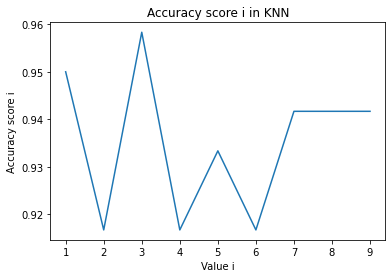

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.84      1.00      0.91        37
 Iris-virginica       1.00      0.84      0.91        43

       accuracy                           0.94       120
      macro avg       0.95      0.95      0.94       120
   weighted avg       0.95      0.94      0.94       120

Akurasi KNN: 94.2%


In [89]:
from sklearn.neighbors import KNeighborsClassifier
i_range= list(range(1,10)) 
scores = []

for i in i_range:
    model_knn=KNeighborsClassifier(n_neighbors=i) 
    model_knn.fit(X_train, y_train)  
    y_predict=model_knn.predict(X_test) 
    scores.append(accuracy_score(y_test, y_predict))

plt.plot(i_range, scores)
plt.xlabel('Value i')
plt.ylabel('Accuracy score i')
plt.title('Accuracy score i in KNN')
plt.tight_layout
plt.show()
model_knn=KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, y_train)  
y_predict=model_knn.predict(X_test)
print(classification_report(y_test, y_predict))

from sklearn.metrics import accuracy_score
from __future__ import division
print('Akurasi KNN: ' + "{:.1%}".format(accuracy_score(y_predict, y_test)))

SVM

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Akurasi SVM: ' + "{:.1%}".format(accuracy_score(y_predict, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.77      1.00      0.87        37
 Iris-virginica       1.00      0.74      0.85        43

       accuracy                           0.91       120
      macro avg       0.92      0.91      0.91       120
   weighted avg       0.93      0.91      0.91       120

[[40  0  0]
 [ 0 37  0]
 [ 0 11 32]]
Akurasi SVM: 94.2%


KESIMPULAN
Setelah dilakukannya klasifikasi untuk bunga Iris menggunakan metodek-nearest neighbor dan Support Vector Machine dengan menggunakan dataset sebesar 80% diperoleh hasil yang sama yaitu 93.3%. jadi bisa diketahui bahwa Metode k-nearest neighbor dan Support Vector Machine memiliki tingkat akurasi yang sama.